In [1]:
import torch
from torch import nn
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
device=torch.device("cuda" if torch.cuda.is_available else "cpu")

In [3]:
class VAE(nn.Module):
    def __init__(self,input_dim,h_dim=100,z_dim=20):
        super().__init__()
        self.featues_2h=nn.Linear(input_dim,h_dim)
        self.h_2u=nn.Linear(h_dim,z_dim)
        self.h_2s=nn.Linear(h_dim,z_dim)
        
        self.z_2hid=nn.Linear(z_dim,h_dim)
        self.h_2features=nn.Linear(h_dim,input_dim)
        
        self.relu=nn.ReLU()

        
    def encode(self,x):
        h=self.relu(self.featues_2h(x))
        u,s=self.h_2u(h),self.h_2s(h)
        return u,s
    
    def decode(self,z):
        h=self.relu(self.z_2hid(z))
        h=self.h_2features(h)
        return h
    def forward(self,x):
        u,s=self.encode(x)
        sample_0u_1s=torch.randn_like(s)
        z_sample=u+s*sample_0u_1s
        new_features=self.decode(z_sample)
        return new_features,u,s

In [4]:
df=pd.read_csv("/kaggle/input/eog-dataset/new_data_eog.csv")

In [5]:
df["label"]=df["502"]

In [6]:
df.drop("502",axis=1,inplace=True)

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,493,494,495,496,497,498,499,500,501,label
0,0,123,122,127,130,123,123,127,128,125,...,143,139,143,141,139,138,142,136,137,1
1,1,120,132,120,127,126,125,120,125,122,...,143,140,139,144,142,139,139,143,134,1
2,2,136,130,141,136,137,135,144,133,143,...,143,141,148,148,144,149,147,150,150,1
3,3,148,150,139,144,144,144,139,148,142,...,135,128,131,132,132,131,133,135,136,1
4,4,118,112,121,120,116,115,119,116,118,...,143,138,135,144,133,133,137,140,95,1


In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,label
0,123,122,127,130,123,123,127,128,125,125,...,143,139,143,141,139,138,142,136,137,1
1,120,132,120,127,126,125,120,125,122,118,...,143,140,139,144,142,139,139,143,134,1
2,136,130,141,136,137,135,144,133,143,144,...,143,141,148,148,144,149,147,150,150,1
3,148,150,139,144,144,144,139,148,142,146,...,135,128,131,132,132,131,133,135,136,1
4,118,112,121,120,116,115,119,116,118,115,...,143,138,135,144,133,133,137,140,95,1


In [10]:
df_train,df_test=train_test_split(df,stratify=df["label"],test_size=0.1,random_state=32)

In [11]:
t=pd.read_csv("/kaggle/working/test.csv")

In [12]:
t.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,label
0,118,116,126,119,123,121,123,118,119,124,...,138,146,146,141,141,140,131,132,134,2
1,126,122,137,125,127,126,128,130,133,127,...,146,142,147,147,145,145,147,146,143,1
2,129,126,137,131,133,133,129,134,133,134,...,135,137,128,132,134,131,126,133,140,4
3,137,131,132,131,131,126,130,131,129,131,...,120,118,121,123,119,123,122,125,133,0
4,118,112,121,120,116,115,119,116,118,115,...,143,138,135,144,133,133,137,140,95,1


In [13]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,label
58,118,116,126,119,123,121,123,118,119,124,...,138,146,146,141,141,140,131,132,134,2
18,126,122,137,125,127,126,128,130,133,127,...,146,142,147,147,145,145,147,146,143,1
21,129,126,137,131,133,133,129,134,133,134,...,135,137,128,132,134,131,126,133,140,4
91,137,131,132,131,131,126,130,131,129,131,...,120,118,121,123,119,123,122,125,133,0
4,118,112,121,120,116,115,119,116,118,115,...,143,138,135,144,133,133,137,140,95,1


In [14]:
df_train.to_csv("train.csv",index=False)

<AxesSubplot: >

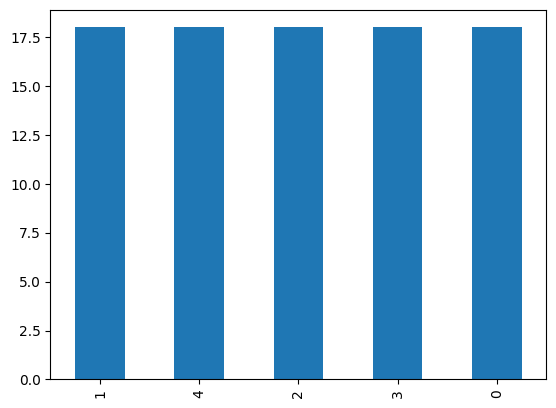

In [11]:
df_train["label"].value_counts().plot(kind="bar")

In [122]:
x_train_0=torch.tensor(df_train[df_train["label"]==0].drop("label",axis=1).values,dtype=torch.float32)
y_train_0=torch.tensor(df_train[df_train["label"]==0]["label"].values,dtype=torch.float32)

x_train_1=torch.tensor(df_train[df_train["label"]==1].drop("label",axis=1).values,dtype=torch.float32)
y_train_1=torch.tensor(df_train[df_train["label"]==1]["label"].values,dtype=torch.float32)

x_train_2=torch.tensor(df_train[df_train["label"]==2].drop("label",axis=1).values,dtype=torch.float32)
y_train_2=torch.tensor(df_train[df_train["label"]==2]["label"].values,dtype=torch.float32)

x_train_3=torch.tensor(df_train[df_train["label"]==3].drop("label",axis=1).values,dtype=torch.float32)
y_train_3=torch.tensor(df_train[df_train["label"]==3]["label"].values,dtype=torch.float32)

x_train_4=torch.tensor(df_train[df_train["label"]==4].drop("label",axis=1).values,dtype=torch.float32)
y_train_4=torch.tensor(df_train[df_train["label"]==4]["label"].values,dtype=torch.float32)



In [123]:
train_data_0=TensorDataset(x_train_0,y_train_0)
train_data_1=TensorDataset(x_train_1,y_train_1)
train_data_2=TensorDataset(x_train_2,y_train_2)
train_data_3=TensorDataset(x_train_3,y_train_3)
train_data_4=TensorDataset(x_train_4,y_train_4)

In [79]:
x_train=torch.tensor(df_train.drop("label",axis=1).values,dtype=torch.float32)
y_train=torch.tensor(df_train["label"].values,dtype=torch.float32)


In [85]:
df_train["label"].values

array([1, 4, 2, 1, 2, 2, 1, 3, 0, 4, 3, 0, 3, 1, 0, 1, 1, 1, 1, 1, 3, 2,
       2, 0, 3, 1, 2, 4, 1, 4, 2, 4, 1, 4, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0,
       3, 1, 1, 4, 4, 3, 4, 2, 0, 1, 1, 2, 3, 2, 4, 2, 4, 2, 1, 4, 2, 0,
       4, 0, 0, 3, 3, 3, 2, 2, 2, 3, 3, 3, 0, 2, 3, 4, 4, 3, 3, 0, 3, 1,
       4, 4])

In [90]:
train_data=TensorDataset(x_train,y_train)


## train_data_0=TensorDataset(x_train_0,y_train_0)

In [84]:
x_train_0.shape

torch.Size([18, 502])

In [534]:
LR=3e-4
Batch_Size=4
model=VAE(502).to(device)
#optimizer=torch.optim.Adam(model.)

In [535]:
Num_Epochs=400

In [536]:
optimizer=torch.optim.Adam(model.parameters(),lr=LR)
loss_fn=nn.MSELoss()

In [545]:
train_loader_0=DataLoader(train_data_4,batch_size=18,shuffle=True)

In [263]:
def predict(loader):
    new_data=[]
    model.eval()
    for idx,(x,_) in enumerate(loader):
        x=x.to(device)
        x_r,u,s=model(x)
        reconstructed_loss=loss_fn(x_r,x)
        print(reconstructed_loss)
        new_data.append(x_r)
    return new_data


In [471]:
def train(loader):
    for epoch in range(Num_Epochs):
        losss=[]
        for idx,(x,_) in enumerate(loader):
            x=x.to(device)
            x_r,u,s=model(x)
            
            reconstructed_loss=loss_fn(x_r,x)
            kl_div=-torch.sum(1+torch.log(s.pow(2))-u.pow(2)-s.pow(2))
            loss=reconstructed_loss+kl_div
            losss.append(loss.item())
            #print(f"loss: {loss}")

            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"loss: {sum(losss)/len(losss)}")
            

In [271]:
model.train()

VAE(
  (featues_2h): Linear(in_features=502, out_features=50, bias=True)
  (h_2u): Linear(in_features=50, out_features=20, bias=True)
  (h_2s): Linear(in_features=50, out_features=20, bias=True)
  (z_2hid): Linear(in_features=20, out_features=50, bias=True)
  (h_2features): Linear(in_features=50, out_features=502, bias=True)
  (relu): ReLU()
)

In [544]:
train(train_loader_0)

loss: 275.744384765625
loss: 240.89394836425782
loss: 278.3990844726562
loss: 280.8390655517578
loss: 335.41550903320314
loss: 297.2552215576172
loss: 296.30565185546874
loss: 317.04071044921875
loss: 292.89410400390625
loss: 278.07872314453124
loss: 236.81401672363282
loss: 245.20600280761718
loss: 243.395068359375
loss: 237.88385009765625
loss: 344.72255249023436
loss: 234.03590698242186
loss: 276.5635681152344
loss: 320.1297637939453
loss: 272.5662506103516
loss: 238.85707397460936
loss: 249.5601318359375
loss: 327.184423828125
loss: 227.5376983642578
loss: 266.8263397216797
loss: 290.73907165527345
loss: 251.252001953125
loss: 224.45509033203126
loss: 269.86354370117186
loss: 266.2768859863281
loss: 263.22906494140625
loss: 318.5501647949219
loss: 304.98692932128904
loss: 292.5111450195312
loss: 271.4313629150391
loss: 324.68431701660154
loss: 268.98883056640625
loss: 301.2204895019531
loss: 280.9920318603516
loss: 278.7036071777344
loss: 282.7716888427734
loss: 274.57701416015624


In [424]:
def get_new_samples(num,loader):
    new_df=pd.DataFrame()
    for i in range(num):
        new_data=predict(loader)
        d=pd.DataFrame(new_data[0].cpu().detach().numpy())
        new_df=new_df.append(d)
    return new_df
        

In [552]:
new_data=get_new_samples(1000,train_loader_0)

tensor(147.0488, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(221.5163, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(140.7926, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(151.8020, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(128.4649, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(220.4473, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(255.0795, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(271.7358, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(182.6102, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(229.7320, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(162.3103, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(176.4817, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(219.3045, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(155.9472, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(116.8473, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(241.8159, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(147.5108, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(130.6634, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(159.3955, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(154.6342, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(126.8026, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(242.8864, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(203.9890, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(194.7437, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(252.7567, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(175.8845, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(187.9862, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(178.3448, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.1240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(185.1787, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(190.3298, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(141.5873, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(303.8345, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(125.3556, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(130.8446, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(136.4100, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(178.7851, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.6263, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(222.4946, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(129.1363, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(200.9742, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(245.2218, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(267.4313, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(102.1204, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.2984, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(146.5737, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(177.2483, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(157.7287, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(146.8780, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(174.6473, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(104.2225, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(160.0280, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(203.7897, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(244.0731, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(235.4585, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(248.5616, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(161.6844, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(184.6084, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(211.5791, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.0804, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(173.9132, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(195.5321, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(158.5770, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(192.3552, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(116.6191, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(146.9151, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(188.3279, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(173.6167, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(187.5207, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(195.4273, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(151.1839, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(199.2515, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(219.3915, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(248.0668, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(158.3499, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(190.8453, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(207.3154, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(201.1834, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(207.8593, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(133.5147, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(179.6367, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(204.4215, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(270.8943, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(229.6477, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(100.6205, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(243.9877, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(225.9917, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(203.6894, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(258.4320, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(202.2162, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.4771, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.1795, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(228.7968, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(167.2992, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(228.5080, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(251.4642, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(232.8918, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(145.0413, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(239.6544, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(179.0675, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(259.0866, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(171.3696, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(117.4602, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(221.5312, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(190.9187, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.0770, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(238.9375, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(167.1231, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(232.7887, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(184.6725, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(222.1163, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(140.8293, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(161.0409, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(275.6346, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(156.2423, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(108.7809, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(171.9662, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(225.0854, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(175.3832, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(132.3633, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(265.6743, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(91.0063, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(180.8533, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(153.0394, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(207.3214, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(231.2240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(170.9167, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(285.6070, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(20

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(144.6651, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(357.3722, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(142.8830, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.3042, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(271.6787, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(297.2827, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(155.2226, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(301.0860, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(274.2307, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(195.8003, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(221.6938, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(190.3008, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(233.8319, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(248.2391, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(257.6285, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(148.3562, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(205.9383, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(194.5378, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(197.8645, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(175.3544, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(132.1994, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(182.6140, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(172.6134, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(151.1581, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(232.7129, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(125.3956, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(182.6377, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(245.9635, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(266.5519, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.4417, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(116.1836, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(208.2631, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(127.1306, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(201.9963, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(146.1186, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(176.7432, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(191.0707, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.7646, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(153.7392, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(111.6447, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(222.6020, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(191.2542, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(153.1640, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(201.2991, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(171.6526, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(144.3204, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(125.6360, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(212.2638, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(190.4305, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(206.2867, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(201.8991, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(147.2724, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(134.4921, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(226.8446, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(187.0886, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(265.1311, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(175.9171, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(149.0331, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(159.7266, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(79.6857, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(129.2532, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(214.0448, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(203.9592, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(214.6817, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(14

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(131.4749, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(139.0136, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(156.0343, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(198.1158, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(200.4229, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(194.9148, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(165.9270, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(203.9646, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(229.2140, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(230.7209, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(112.4229, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(186.1322, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(147.6455, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(220.5774, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(172.4983, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(118.9459, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(293.2719, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(191.3944, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(181.9241, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(161.5252, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(125.8222, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.7731, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(183.6314, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(229.7608, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(179.8197, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.5365, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(222.8251, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(181.8910, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(224.4697, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(227.0853, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.4593, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(163.6294, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(172.6106, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(301.4045, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(150.8829, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(160.8018, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(154.0738, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(151.3810, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(250.3194, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.1695, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(184.4564, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(157.2593, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(180.0301, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(158.6080, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(212.3922, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(220.4462, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(117.5070, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(210.7837, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(215.8297, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(215.3514, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(220.1098, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(181.7129, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(154.6919, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(215.5747, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(107.8709, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(170.8028, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(108.6600, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.8016, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(163.6007, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.1136, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(228.8908, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(230.1224, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(139.0076, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(120.2449, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(175.7986, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(168.2531, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(229.7555, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(138.4449, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(177.4457, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(152.8090, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(183.3069, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(198.0765, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(189.0987, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(239.0087, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(177.3646, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(83.2103, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(209.9370, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(152.0494, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(138.4463, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(191.8355, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(20

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(105.3806, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(155.0014, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(126.9311, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.9054, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(233.1694, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(150.6180, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(153.9634, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(188.8611, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(236.1885, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(237.1179, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(202.1246, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.1000, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(207.5151, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(141.5763, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(253.1736, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.9912, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(222.8767, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(218.9087, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(226.7128, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(121.0213, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(260.0156, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(260.6121, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(143.9306, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(259.4068, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(204.5011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(178.4391, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(186.7203, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(201.7236, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(212.8857, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(130.5653, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(190.5074, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(160.8669, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(159.1382, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(198.3722, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(142.7547, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.9435, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(252.4896, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(187.2938, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(155.4466, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.9512, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(216.8310, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(212.5045, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(192.8308, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(172.9070, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(227.8608, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(195.6992, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(206.5488, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(170.5354, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(183.6097, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(171.7402, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(118.3127, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(159.9231, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(213.7151, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(274.9705, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(148.9259, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(298.7917, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(193.0232, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(185.2002, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(133.6591, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(204.9496, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(159.5593, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(215.3934, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(177.2790, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(166.9287, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(233.5798, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(167.3759, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(130.9030, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(240.8590, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(152.5256, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(205.0730, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(194.6250, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(133.3141, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(163.4783, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(255.8148, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(173.6326, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(149.4910, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(154.0460, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(198.0849, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(143.4616, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(110.3919, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(193.3359, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(204.3271, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(167.4761, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(152.0536, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(215.6890, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(175.5917, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(226.6387, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(170.9848, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(294.7109, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(190.0499, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(247.3762, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(226.2217, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(196.7962, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(164.1724, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(158.6051, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(182.9025, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(168.7437, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(214.4725, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(245.2655, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(235.7826, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(216.3130, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(208.7990, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(217.7955, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(241.7120, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(125.5406, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(192.9131, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(186.1856, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(167.3509, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(216.9485, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(198.8742, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(280.7587, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(156.9023, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(166.2047, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(169.9493, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(179.0461, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(141.1991, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(228.9697, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(151.2823, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(157.1828, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(147.0130, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(357.1102, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(205.8812, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(218.6153, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(125.9335, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(159.9113, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(178.2676, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(174.6303, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(240.0289, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(264.4415, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(250.7050, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(171.7437, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(181.0707, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(129.4233, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(189.1517, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(251.2571, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(105.9453, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(205.6981, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(158.8145, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(163.6194, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(143.5687, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(231.4110, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(192.7354, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(162.4789, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(184.1461, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2

/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

tensor(149.9765, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(135.0249, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(132.6400, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(210.4339, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(206.6304, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(144.9586, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(182.4179, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(222.3531, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(193.3749, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(157.2292, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(226.3072, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(167.6873, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(187.2694, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(155.0859, device='cuda:0', grad_fn=<MseLossBackward0>)


/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(d)
/tmp/ipykernel_31/3132584078.p

In [553]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,135.580032,136.299301,134.112091,136.307022,136.090271,134.754959,135.196228,135.183441,135.211212,134.009186,...,135.093552,136.639008,133.615265,133.772888,136.931091,135.540222,133.512177,136.234634,136.903412,137.990616
1,149.653351,150.157394,148.305573,151.050217,150.880508,149.487747,149.462509,150.163437,149.397766,147.675201,...,149.276703,151.083755,148.223221,148.127197,150.793442,149.127472,148.305862,150.757767,151.367859,153.351578
2,145.902466,146.732224,144.582397,147.068512,146.912430,145.281113,145.434494,146.020844,145.713242,144.114059,...,145.425049,147.075195,144.398270,144.182251,147.370468,145.236649,144.184357,146.814316,147.083069,149.020035
3,139.398499,140.013290,137.961731,140.367661,140.178879,138.940933,138.867844,139.274109,138.894852,137.475357,...,138.899155,140.517761,137.474747,137.565720,140.382599,139.069519,137.816879,140.541016,140.750122,142.429123
4,154.881775,155.456467,153.395737,155.855927,155.899521,154.532700,154.214706,154.875793,154.426865,152.742630,...,154.508499,155.977112,153.178818,152.795029,156.256500,154.532700,153.065659,155.963104,156.537140,158.280838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,124.332893,125.337120,123.369110,125.365395,125.037025,124.135925,124.025810,124.443054,123.912041,122.932404,...,124.345062,125.411919,122.864868,123.058029,125.714615,124.393570,122.801331,125.421410,125.811592,127.139732
14,138.809052,139.569595,137.444611,139.846954,139.908615,138.437057,138.280945,139.151108,138.720688,136.867584,...,138.798126,139.761322,137.714218,137.077606,140.236069,138.428345,136.733200,139.518463,139.848969,141.850204
15,133.854736,133.998184,132.657440,134.200241,134.209610,133.367294,133.492874,133.831573,133.446960,132.728119,...,133.307251,134.887817,131.953537,132.341827,135.399551,133.895111,131.891617,134.208817,135.241837,136.407974
16,119.347588,120.040909,117.843102,120.112389,120.031120,118.684700,119.147789,119.348701,119.645081,117.720741,...,119.103935,120.109848,118.198151,117.540497,120.582672,119.050446,117.323830,119.922585,120.264587,121.504654


In [559]:
new_data["label"]=4

In [128]:
import numpy as np

In [560]:
new_data.to_csv("data4.csv",index=False)

In [143]:
pd.DataFrame(new_data[0].cpu().detach().numpy()).to_csv("data0Sample2.csv")

In [549]:
torch.save(model.state_dict(),"/kaggle/working/model4.pt")

In [341]:
v=s.iloc[1]
v=v.squeeze()

In [134]:
import matplotlib.pyplot as plt

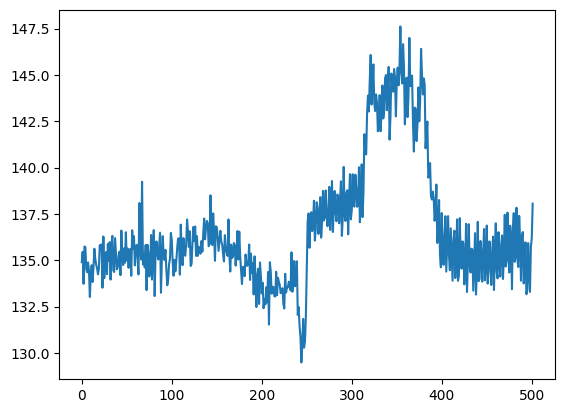

In [558]:
#for i in range(55,56):
v=new_data.iloc[300]
v=v.squeeze()
plt.plot(np.arange(0,502),v)

In [389]:
s=pd.DataFrame(new_data[0].cpu().detach().numpy())

In [390]:
s

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,120.878853,120.097153,122.783760,121.820717,119.656990,121.478813,120.634155,120.564774,121.632286,122.076630,...,126.441261,126.587585,127.331139,127.385590,126.774979,127.486679,128.165237,127.653175,128.429581,132.259338
1,115.195549,114.853989,117.014572,116.101646,114.112152,115.872459,115.483902,114.906380,115.835991,116.075470,...,120.636345,120.821838,121.101547,121.321037,120.552437,121.704910,122.413368,121.230843,122.578087,125.976906
2,119.524040,119.091949,121.221947,120.389122,118.437355,120.286888,119.540100,119.031479,120.540749,120.640190,...,125.161293,125.532890,125.724190,126.093468,125.272118,126.318954,126.898354,126.188698,127.081108,131.346451
3,119.793869,119.245239,122.234314,120.938316,119.087646,120.617973,120.023941,119.323135,120.755089,120.691650,...,125.733955,125.444633,126.508080,125.941635,125.640709,126.164185,127.050697,126.267532,127.408318,131.953384
4,118.124321,117.885651,120.375023,119.017227,117.305252,119.064461,118.626221,117.969437,118.758873,119.052460,...,123.950203,124.109299,124.231415,124.148781,123.664589,124.545158,125.484840,124.081642,125.709114,129.660095
5,124.490059,124.077034,126.707283,125.576820,123.374565,125.194351,124.625908,124.467995,125.241707,125.597420,...,130.321335,130.411133,130.991806,130.780457,130.546677,131.045074,132.085495,131.038803,132.480331,135.581802
6,114.174217,113.568192,116.109016,115.025497,113.380676,115.029457,114.200562,113.639847,114.698280,114.936981,...,119.808746,119.790405,120.225082,120.246361,119.424080,120.645386,120.960320,120.113007,121.422203,126.040413
7,116.851158,116.836937,119.823517,118.655930,116.351585,117.917000,117.497810,117.285172,117.682388,118.366180,...,123.078049,122.853622,123.604141,123.230721,122.921761,123.523705,124.346916,123.237663,124.927650,128.673080
8,129.345001,128.335571,131.428146,130.355499,127.854530,130.209259,129.201706,128.605637,129.990448,130.344101,...,135.371353,135.471191,136.129562,136.410645,135.396957,136.433334,136.838821,136.416458,137.170959,142.461746
9,122.623726,122.046524,124.797768,123.811867,121.450798,123.569084,122.645981,122.372917,123.598640,123.932243,...,128.467270,128.832932,129.203400,129.208801,128.606598,129.279404,129.974091,129.490707,130.495056,135.101364


In [391]:
s.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,120.878853,120.097153,122.783760,121.820717,119.656990,121.478813,120.634155,120.564774,121.632286,122.076630,...,126.441261,126.587585,127.331139,127.385590,126.774979,127.486679,128.165237,127.653175,128.429581,132.259338
1,115.195549,114.853989,117.014572,116.101646,114.112152,115.872459,115.483902,114.906380,115.835991,116.075470,...,120.636345,120.821838,121.101547,121.321037,120.552437,121.704910,122.413368,121.230843,122.578087,125.976906
2,119.524040,119.091949,121.221947,120.389122,118.437355,120.286888,119.540100,119.031479,120.540749,120.640190,...,125.161293,125.532890,125.724190,126.093468,125.272118,126.318954,126.898354,126.188698,127.081108,131.346451
3,119.793869,119.245239,122.234314,120.938316,119.087646,120.617973,120.023941,119.323135,120.755089,120.691650,...,125.733955,125.444633,126.508080,125.941635,125.640709,126.164185,127.050697,126.267532,127.408318,131.953384
4,118.124321,117.885651,120.375023,119.017227,117.305252,119.064461,118.626221,117.969437,118.758873,119.052460,...,123.950203,124.109299,124.231415,124.148781,123.664589,124.545158,125.484840,124.081642,125.709114,129.660095
5,124.490059,124.077034,126.707283,125.576820,123.374565,125.194351,124.625908,124.467995,125.241707,125.597420,...,130.321335,130.411133,130.991806,130.780457,130.546677,131.045074,132.085495,131.038803,132.480331,135.581802
6,114.174217,113.568192,116.109016,115.025497,113.380676,115.029457,114.200562,113.639847,114.698280,114.936981,...,119.808746,119.790405,120.225082,120.246361,119.424080,120.645386,120.960320,120.113007,121.422203,126.040413
7,116.851158,116.836937,119.823517,118.655930,116.351585,117.917000,117.497810,117.285172,117.682388,118.366180,...,123.078049,122.853622,123.604141,123.230721,122.921761,123.523705,124.346916,123.237663,124.927650,128.673080
8,129.345001,128.335571,131.428146,130.355499,127.854530,130.209259,129.201706,128.605637,129.990448,130.344101,...,135.371353,135.471191,136.129562,136.410645,135.396957,136.433334,136.838821,136.416458,137.170959,142.461746
9,122.623726,122.046524,124.797768,123.811867,121.450798,123.569084,122.645981,122.372917,123.598640,123.932243,...,128.467270,128.832932,129.203400,129.208801,128.606598,129.279404,129.974091,129.490707,130.495056,135.101364


In [386]:
c=s.copy()

In [561]:
data0=pd.read_csv("/kaggle/working/data0.csv")
data1=pd.read_csv("/kaggle/working/data1.csv")
data2=pd.read_csv("/kaggle/working/data2.csv")
data3=pd.read_csv("/kaggle/working/data3.csv")
data4=pd.read_csv("/kaggle/working/data4.csv")

In [568]:
data=pd.DataFrame()


In [569]:
data=data.append(data0)
data=data.append(data1)
data=data.append(data2)
data=data.append(data3)
data=data.append(data4)

/tmp/ipykernel_31/2408904200.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(data0)
/tmp/ipykernel_31/2408904200.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(data1)
/tmp/ipykernel_31/2408904200.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(data2)
/tmp/ipykernel_31/2408904200.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(data3)
/tmp/ipykernel_31/2408904200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(data4)


In [571]:
data.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,label
0,119.900475,119.400240,121.634130,120.417150,118.935570,120.542290,119.97114,119.359170,120.436880,120.585410,...,125.48640,125.88553,126.287210,125.532080,126.725920,127.39982,126.084040,127.291954,130.962050,0
1,114.651810,114.381620,116.941430,116.051570,113.676840,115.652410,114.98231,114.495605,115.141914,115.802380,...,120.30794,121.01095,120.982544,119.914240,121.270996,121.61847,120.561850,122.490870,126.625900,0
2,119.752410,119.130844,121.314995,120.523430,118.289314,120.477450,119.91410,119.002380,119.870895,120.143745,...,125.40526,125.50014,126.000070,124.928246,126.531350,126.81142,125.555620,127.334510,131.295940,0
3,117.469640,116.408775,118.938920,117.980340,115.882996,118.108440,116.89807,116.771910,117.669044,117.961410,...,122.57654,123.00664,123.543434,122.781300,123.740890,124.05496,123.421150,124.499380,127.495460,0
4,137.385280,137.248440,140.106490,138.845230,136.399800,138.612410,137.85250,137.357960,138.162190,138.558880,...,144.48299,144.49768,144.570980,143.938640,145.097320,145.86456,144.382020,146.594010,150.957530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,124.332890,125.337120,123.369110,125.365395,125.037025,124.135925,124.02581,124.443054,123.912040,122.932400,...,125.41192,122.86487,123.058030,125.714615,124.393570,122.80133,125.421410,125.811590,127.139730,4
89996,138.809050,139.569600,137.444610,139.846950,139.908620,138.437060,138.28094,139.151110,138.720690,136.867580,...,139.76132,137.71422,137.077600,140.236070,138.428340,136.73320,139.518460,139.848970,141.850200,4
89997,133.854740,133.998180,132.657440,134.200240,134.209610,133.367300,133.49287,133.831570,133.446960,132.728120,...,134.88782,131.95354,132.341830,135.399550,133.895110,131.89162,134.208820,135.241840,136.407970,4
89998,119.347590,120.040910,117.843100,120.112390,120.031120,118.684700,119.14779,119.348700,119.645080,117.720740,...,120.10985,118.19815,117.540500,120.582670,119.050446,117.32383,119.922585,120.264590,121.504654,4


In [573]:
data = data.sample(frac = 1)


In [575]:
data.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,label
0,128.990360,128.232480,130.824250,129.94322,127.367550,129.836000,128.735670,128.379550,129.209850,129.84020,...,135.121020,135.532560,135.74667,134.74812,135.923830,136.55272,135.56111,137.055070,140.85074,0
1,131.915000,131.112380,130.744170,132.02776,130.078610,130.614470,131.283680,131.463940,130.678570,130.86604,...,138.887270,138.536010,138.94771,139.48710,139.445770,138.00964,139.39134,139.810680,102.76880,2
2,124.082670,124.757590,126.129745,123.58859,124.121940,124.996220,123.151680,125.698326,124.077830,123.98388,...,135.474610,133.039550,132.51044,134.72357,134.053970,134.04532,135.59937,134.490520,136.33350,3
3,124.453760,125.315605,123.608505,125.53383,125.381294,124.212555,124.274500,124.609474,124.391716,122.84793,...,125.983025,122.852560,123.50645,125.65188,124.334190,123.52814,125.21875,126.042755,127.44922,4
4,130.684840,130.643810,129.877380,130.75362,131.466770,130.158520,130.723510,130.590790,131.755340,130.08190,...,138.301640,138.209270,139.63678,137.37431,137.308010,139.55626,138.51872,137.504100,139.84236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,116.105490,116.842760,117.964485,115.56531,116.438050,116.729840,114.958230,117.786430,116.375330,115.93896,...,126.204895,124.482376,123.89326,126.06514,125.395905,125.40487,126.70384,126.021576,127.63532,3
89996,126.556175,126.487640,125.841630,126.80462,127.234960,126.027630,126.800575,126.373184,127.418700,125.79833,...,133.737990,133.932340,134.94208,133.25706,133.169370,134.72750,133.67159,132.776120,135.66241,1
89997,151.569580,151.776110,149.958660,152.37563,152.445470,150.919920,151.206020,151.491700,150.763080,149.63297,...,152.758330,149.719160,149.72461,152.84190,150.949740,149.94774,152.19467,152.933440,154.81350,4
89998,134.562590,134.688640,134.585050,134.25291,135.564560,134.562330,135.551030,135.218170,135.832660,134.24887,...,142.525730,142.753510,143.76090,142.02405,142.105450,143.71611,142.93355,142.081910,144.96200,1


In [576]:
data.to_csv("newdata.csv",index=False)